In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from osgeo import gdal,ogr,osr
from scipy.signal import savgol_filter
from scipy.stats import pearsonr
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import pandas as pd
from osgeo import gdal,ogr,osr
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

In [2]:
df_spectral = pd.read_csv(r"D:\wenqu\aviris\PLSR\output.csv")
df_spectral

,file_name,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,...,band_113,band_114,band_115,band_116,band_117,band_118,band_119,band_120,band_121,band_122
0,9_9,-0.007408,-0.001187,0.002304,0.004542,0.005452,0.006617,0.009321,0.010906,0.010206,...,0.165042,0.167003,0.163492,0.165492,0.165300,0.161843,0.165384,0.168709,0.167595,0.170170
1,9_8,-0.012122,-0.008056,-0.003529,0.000230,0.000568,0.000611,0.005055,0.008242,0.006994,...,0.176659,0.176466,0.173304,0.175908,0.173966,0.173316,0.175109,0.178707,0.175427,0.179748
2,9_7,-0.012122,-0.008056,-0.003529,0.000230,0.000568,0.000611,0.005055,0.008242,0.006994,...,0.176659,0.176466,0.173304,0.175908,0.173966,0.173316,0.175109,0.178707,0.175427,0.179748
3,9_6,-0.001092,-0.003444,0.000763,0.003271,0.004058,0.007828,0.009567,0.011485,0.010938,...,0.180520,0.175171,0.175264,0.178075,0.176523,0.177661,0.175174,0.178987,0.177515,0.181104
4,9_5,-0.005341,-0.009759,-0.004499,0.000391,0.001929,0.005225,0.006398,0.007666,0.009711,...,0.174059,0.167857,0.168702,0.173387,0.170735,0.171412,0.170000,0.174250,0.173621,0.175200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,10_14,-0.003952,-0.006941,0.000130,0.000681,0.004079,0.007794,0.007171,0.007492,0.009364,...,0.184671,0.182148,0.180551,0.184807,0.182426,0.179681,0.179483,0.182284,0.183629,0.188575
722,10_13,-0.002772,-0.003981,0.001905,0.004149,0.005854,0.009877,0.010416,0.010586,0.012591,...,0.170736,0.168617,0.170126,0.175361,0.171327,0.169458,0.168707,0.171626,0.171940,0.176962
723,10_12,-0.001224,-0.005744,0.002050,0.003515,0.005537,0.008080,0.009855,0.009020,0.012530,...,0.174656,0.170958,0.173822,0.178146,0.174309,0.172389,0.173318,0.174330,0.175925,0.180592
724,10_11,-0.002536,-0.003103,0.003378,0.003068,0.006684,0.010022,0.010580,0.009642,0.012815,...,0.173443,0.171171,0.173736,0.176453,0.173867,0.172495,0.171962,0.173861,0.175423,0.179656


In [3]:
df_spectral['file_name']

0        9_9
1        9_8
2        9_7
3        9_6
4        9_5
       ...  
721    10_14
722    10_13
723    10_12
724    10_11
725    10_10
Name: file_name, Length: 726, dtype: object

In [4]:
band_name = []
for i in range(1, 123):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

In [5]:
band_name

['band_1',
 'band_2',
 'band_3',
 'band_4',
 'band_5',
 'band_6',
 'band_7',
 'band_8',
 'band_9',
 'band_10',
 'band_11',
 'band_12',
 'band_13',
 'band_14',
 'band_15',
 'band_16',
 'band_17',
 'band_18',
 'band_19',
 'band_20',
 'band_21',
 'band_22',
 'band_23',
 'band_24',
 'band_25',
 'band_26',
 'band_27',
 'band_28',
 'band_29',
 'band_30',
 'band_31',
 'band_32',
 'band_33',
 'band_34',
 'band_35',
 'band_36',
 'band_37',
 'band_38',
 'band_39',
 'band_40',
 'band_41',
 'band_42',
 'band_43',
 'band_44',
 'band_45',
 'band_46',
 'band_47',
 'band_48',
 'band_49',
 'band_50',
 'band_51',
 'band_52',
 'band_53',
 'band_54',
 'band_55',
 'band_56',
 'band_57',
 'band_58',
 'band_59',
 'band_60',
 'band_61',
 'band_62',
 'band_63',
 'band_64',
 'band_65',
 'band_66',
 'band_67',
 'band_68',
 'band_69',
 'band_70',
 'band_71',
 'band_72',
 'band_73',
 'band_74',
 'band_75',
 'band_76',
 'band_77',
 'band_78',
 'band_79',
 'band_80',
 'band_81',
 'band_82',
 'band_83',
 'band_84',
 

In [6]:
x_spectra = df_spectral[band_name]
x = x_spectra.to_numpy()

In [7]:
x.shape

(726, 122)

In [8]:
def gaus(X,C,X_mean,sigma):
    return C*exp(-(X-X_mean)**2/(2*sigma**2))

In [9]:
la_trait_pdf = []
for file_name in df_spectral['file_name']:
    print(file_name)
    file_name = 'D:/wenqu/aviris/PLSR/site2a_clip/' + file_name + '.tif'
    x_data = gdal.Open(file_name).ReadAsArray().flatten()
    hist, bin_edges = np.histogram(x_data)
    hist=hist/sum(hist)
    n = len(hist)
    x_hist=np.zeros((n),dtype=float) 
    # middle value for each bin, has the same shape as y_hist
    for ii in range(n):
        x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2
    # number of values falling into each bins - probability     
    y_hist=hist
    mean = sum(x_hist*y_hist)/sum(y_hist)                  
    sigma = sum(y_hist*(x_hist-mean)**2)/sum(y_hist) 
    param_optimised,param_covariance_matrix = curve_fit(gaus,x_hist,y_hist,p0=[max(y_hist),mean,sigma],maxfev=5000)

#     x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),500)
    la_trait_pdf.append(param_optimised[0])


9_9
9_8
9_7
9_6
9_5
9_4
9_3
9_27
9_26
9_25
9_24
9_23
9_22
9_21
9_20
9_2
9_19
9_18
9_17
9_16
9_15
9_14
9_13
9_12
9_11
9_10
8_9
8_8
8_7
8_6
8_5
8_4
8_3
8_27
8_26
8_25
8_24
8_23
8_22
8_21
8_20
8_19
8_18
8_17
8_16
8_15
8_14
8_13
8_12
8_11
8_10
7_9
7_8
7_7
7_6
7_26
7_25
7_24
7_23
7_22
7_21
7_20
7_19
7_18
7_17
7_16
7_15
7_14
7_13
7_12
7_11
7_10
6_9
6_25
6_24
6_23
6_22
6_21
6_20
6_19
6_18
6_17
6_16
6_15
6_14
6_13
6_12
6_11
6_10
5_25
5_24
5_23
5_22
5_21
5_20
5_19
5_18
5_17
5_16
5_15
5_14
5_13
5_12
4_25
4_24
4_23
4_22
4_21
4_20
4_19
4_18
4_17
34_9
34_8
34_7
34_11
34_10
33_9
33_8
33_7
33_6
33_13
33_12
33_11
33_10
32_9
32_8
32_7
32_6
32_17
32_16
32_15
32_14
32_13
32_12


C:\Users\laral\AppData\Local\Temp\ipykernel_30340\1587569527.py:2: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return C*exp(-(X-X_mean)**2/(2*sigma**2))
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


32_11
32_10
31_9
31_8
31_7
31_6
31_5
31_20
31_19
31_18
31_17
31_16
31_15
31_14
31_13
31_12
31_11
31_10
30_9
30_8
30_7
30_6
30_22
30_21
30_20
30_19
30_18
30_17
30_16
30_15
30_14
30_13
30_12
30_11
30_10
3_24
3_23
3_22
3_21
3_20
3_19
3_18
29_9
29_8
29_7
29_25
29_24
29_23
29_22
29_21
29_20
29_19
29_18
29_17
29_16
29_15
29_14
29_13
29_12
29_11
29_10
28_9
28_8
28_7
28_6
28_5
28_4
28_27
28_26
28_25
28_24
28_23
28_22
28_21
28_20
28_19
28_18
28_17
28_16
28_15
28_14
28_13
28_12
28_11
28_10
27_9
27_8
27_7
27_6
27_5
27_4
27_30
27_29
27_28
27_27
27_26
27_25
27_24
27_23
27_22
27_21
27_20
27_19
27_18
27_17
27_16
27_15
27_14
27_13
27_12
27_11
27_10
26_9
26_8
26_7
26_6
26_5
26_4
26_31
26_30
26_29
26_28
26_27
26_26
26_25
26_24
26_23
26_22
26_21
26_20
26_19
26_18
26_17
26_16
26_15
26_14
26_13
26_12
26_11
26_10
25_9
25_8
25_7
25_6
25_5
25_31
25_30
25_29
25_28
25_27
25_26
25_25
25_24
25_23
25_22
25_21
25_20
25_19
25_18
25_17
25_16
25_15
25_14
25_13
25_12
25_11
25_10
24_9
24_8
24_7
24_6
24_31
24_30
24_3
24_

In [10]:
len(la_trait_pdf)

726

In [11]:
y = la_trait_pdf
y = np.array(y)


In [12]:
y.shape

(726,)

In [13]:
print(y.dtype)

float64


In [14]:
y.shape, x.shape

((726,), (726, 122))

In [15]:
band_name = np.array(band_name)

In [16]:
# Python
def pls_variable_selection(X, y, max_comp):
    
    # Define MSE array to be populated
    mse = np.zeros((max_comp,X.shape[1]))
 
    # Loop over the number of PLS components
    for i in range(max_comp):
        
        # Regression with specified number of components, using full spectrum
        pls1 = PLSRegression(n_components=i+1)
        pls1.fit(X, y)
        
        # Indices of sort spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_[:,0]))
 
        # Sort spectra accordingly 
        Xc = X[:,sorted_ind]
 
        # Discard one wavelength at a time of the sorted spectra,
        # regress, and calculate the MSE cross-validation
        for j in range(Xc.shape[1]-(i+1)):
 
            pls2 = PLSRegression(n_components=i+1)
            pls2.fit(Xc[:, j:], y)
            
            y_cv = cross_val_predict(pls2, Xc[:, j:], y, cv=5)
 
            mse[i,j] = mean_squared_error(y, y_cv)
    
        comp = 100*(i+1)/(max_comp)
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    # # Calculate and print the position of minimum in MSE
    mseminx,mseminy = np.where(mse==np.min(mse[np.nonzero(mse)]))
 
    print("Optimised number of PLS components: ", mseminx[0]+1)
    print("Wavelengths to be discarded ",mseminy[0])
    print('Optimised MSEP ', mse[mseminx,mseminy][0])
    stdout.write("\n")
    # plt.imshow(mse, interpolation=None)
    # plt.show()
 
 
    # Calculate PLS with optimal components and export values
    pls = PLSRegression(n_components=mseminx[0]+1)
    pls.fit(X, y)
        
    sorted_ind = np.argsort(np.abs(pls.coef_[:,0]))
 
    Xc = X[:,sorted_ind]
 
    return(Xc[:,mseminy[0]:],mseminx[0]+1,mseminy[0], sorted_ind)

In [17]:
def simple_pls_cv(X, y, n_comp):
    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)
    y_c = pls.predict(X)
 
    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=10)    
 
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
 
    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
 
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
        # Plot regression 
 
    z = np.polyfit(y, y_cv, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_cv, y, c='red', edgecolors='k')
        ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        
        plt.show()

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


3% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


13% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


23% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


33% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


43% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


53% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


63% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


73% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


83% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


93% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  3
Wavelengths to be discarded  117
Optimised MSEP  21.11764381045737

R2 calib: 0.015
R2 CV: -0.005
MSE calib: 20.728
MSE CV: 21.161


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


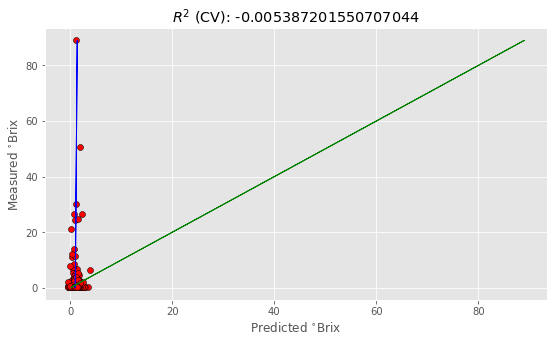

In [18]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x, y, 30)
simple_pls_cv(opt_Xc, y, ncomp)